In [1]:
import sqlite3 as sql
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import random
import yaml
import subprocess
import os

import runMops
import MopsAnalysis
import MopsReader
import MopsPlotter
from MopsTracker import MopsTracker
from MopsParameters import MopsParameters
from MopsResults import MopsResults

% matplotlib inline

In [2]:
dataDrive = "/Volumes/DataCenter/"
dataLocation = "neosimData/jpl/oc28-30EditedSSMIDs.txt"
subsampleLocation = "neosimData/jpl_2016_04_28_chiProb00_maxRMS005_trackAdd05_detErr0034_accel50/"
runLocation = dataDrive + subsampleLocation

In [31]:
dets_df = MopsReader.readDetectionsIntoDataframe(dataDrive + dataLocation)
dets_df

,visitId,objectId,ra,dec,mjd,mag,snr
diaId,,,,,,,
0,1632978,0,176.493376,-11.783686,52390.965381,20.1233,14.68430
1,1632981,1,173.720592,-4.184379,52390.967172,20.0718,15.08580
2,1632982,2,174.183623,-2.062412,52390.967618,18.0567,100.80400
3,1632982,3,174.496816,-3.012748,52390.967618,20.0325,15.71120
4,1632982,1,173.721745,-4.183480,52390.967618,20.0708,15.08180
5,1632983,4,168.551646,-14.376801,52390.969452,19.6707,26.04840
6,1632988,1,173.733460,-4.174343,52390.972152,20.0851,15.15950
7,1632991,5,180.172511,-14.736185,52390.973526,18.8048,54.38470
8,1632996,6,184.203462,-24.600833,52390.976214,21.2715,5.01000


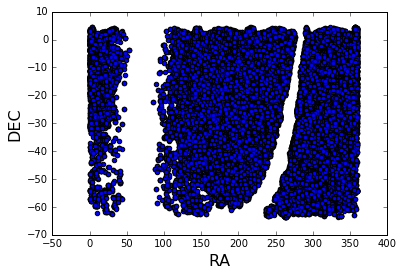

In [4]:
MopsPlotter.plotDataframe(dets_df)

In [5]:
nightly = dataDrive + "neosimData/jpl/nightly/"

! rm -rf {nightly}
! mkdir {nightly}

In [6]:
call = ["python", os.getenv("MOPS_DIR") + "/bin/splitByNight.py", "-n", nightly, dataDrive + dataLocation]
subprocess.call(call);

In [3]:
parameters = MopsParameters(velocity_max="10.0", ra_acceleration_max="5.0", dec_acceleration_max="5.0", detection_error_threshold="0.0034")
tracker = MopsTracker(runLocation)
tracker.getDetections(nightly)

------- MOPS Parameters --------
Current Parameter Values:

---- findTracklets ----
	Maximum velocity:                         10.0
	Minimum velocity:                         0.0
---- collapseTracklets ----
	Right Ascension tolerance:                0.002
	Declination tolerance:                    0.002
	Angular tolerance:                        5
	Velocity tolerance:                       0.05
	Method:                                   greedy
	Use RMS filter:                           True
	Maximum RMS:                              0.001
---- purifyTracklets ----
	Maximum RMS:                              0.001
---- removeSubsets (tracklets) ----
	Remove subsets:                           False
	Keep only longest:                        False
---- makeLinkTrackletsInput_byNight.py ----
	Window size:                              15
---- linkTracklets ----
	Detection error threshold:                0.0034
	Maximum right ascension acceleration:     5.0
	Maximum declination acceleration: 

NameError: name 'nightly' is not defined

In [8]:
parameters, tracker = runMops.runMops(parameters, tracker, overwrite=True)

------- Run MOPS -------
Running LSST's Moving Object Pipeline

Overwrite triggered: clearing tracker...

Found 72 detection files in /Volumes/DataCenter/neosimData/jpl/nightly/.

Saving parameters to /Volumes/DataCenter/neosimData/jpl_2016_04_28_chiProb00_maxRMS005_trackAdd05_detErr0034_accel50/parameters.yaml

------- Run MOPS -------
Running findTracklets...
Completed running findTracklets.

Saving tracker to /Volumes/DataCenter/neosimData/jpl_2016_04_28_chiProb00_maxRMS005_trackAdd05_detErr0034_accel50/tracker.yaml

------- Run MOPS -------
Running idsToIndices.py...
Completed running idsToIndices.py.

Saving tracker to /Volumes/DataCenter/neosimData/jpl_2016_04_28_chiProb00_maxRMS005_trackAdd05_detErr0034_accel50/tracker.yaml

------- Run MOPS -------
Running collapseTracklets...
Completed running collapseTracklets.

------- Run MOPS -------
Running indicesToIds.py...
Completed running indicesToIds.py.

Saving tracker to /Volumes/DataCenter/neosimData/jpl_2016_04_28_chiProb00_maxR

In [3]:
parameters = MopsParameters.fromYaml(runLocation + "parameters.yaml")
tracker = MopsTracker.fromYaml(runLocation + "tracker.yaml")

Loading parameters from /Volumes/DataCenter/neosimData/jpl_2016_04_28_chiProb00_maxRMS005_trackAdd05_detErr0034_accel50/parameters.yaml
Loading tracker from /Volumes/DataCenter/neosimData/jpl_2016_04_28_chiProb00_maxRMS005_trackAdd05_detErr0034_accel50/tracker.yaml


In [ ]:
results, df = MopsAnalysis.analyze(parameters, tracker, fullDetFile=dataDrive + dataLocation, overwrite=True)

Initializing new results object...
Creating DiaSources table...
Creating AllObjects table...
Creating FoundObjects view...
Creating MissedObjects view...
Creating AllTracklets table...
Creating TrackletMembers table...
Creating Tracklets view...
Creating CollapsedTracklets view...
Creating PurifiedTracklets view...
Creating FinalTracklets view...

Reading full detections file into dataframe...
Counting findable objects as tracklets...
Counting findable objects as tracks...
Building objects dataframe...
Updating objects dataframe...
Reading full detections file into database...

Starting tracklet analysis for 72 nights...

Starting tracklet analysis for night 52391 at Thu Apr 28 12:43:36 2016

- Writing results to /Volumes/DataCenter/neosimData/jpl_2016_04_28_chiProb00_maxRMS005_trackAdd05_detErr0034_accel50/results/52391.results
- Checking file sizes...
- Reading input detections...
- Counting findable objects...
- Updating results object...
Saving results to /Volumes/DataCenter/neosim

In [4]:
results = MopsResults.fromYaml(runLocation + "results.yaml")

Loading results from /Volumes/DataCenter/neosimData/jpl_2016_04_28_chiProb00_maxRMS005_trackAdd05_detErr0034_accel50/results.yaml


In [5]:
import MopsDatabase
import MopsPlotter

In [6]:
con = sql.connect(tracker.mainDatabase)
window_dbs = MopsDatabase.attachDatabases(con, tracker.windowDatabases)

Proceeding with the first 10 databases...
Attaching /Volumes/DataCenter/neosimData/jpl_2016_04_28_chiProb00_maxRMS005_trackAdd05_detErr0034_accel50/results/52391-52406.db to con as db0...
Attaching /Volumes/DataCenter/neosimData/jpl_2016_04_28_chiProb00_maxRMS005_trackAdd05_detErr0034_accel50/results/52392-52406.db to con as db1...
Attaching /Volumes/DataCenter/neosimData/jpl_2016_04_28_chiProb00_maxRMS005_trackAdd05_detErr0034_accel50/results/52393-52408.db to con as db2...
Attaching /Volumes/DataCenter/neosimData/jpl_2016_04_28_chiProb00_maxRMS005_trackAdd05_detErr0034_accel50/results/52394-52408.db to con as db3...
Attaching /Volumes/DataCenter/neosimData/jpl_2016_04_28_chiProb00_maxRMS005_trackAdd05_detErr0034_accel50/results/52395-52410.db to con as db4...
Attaching /Volumes/DataCenter/neosimData/jpl_2016_04_28_chiProb00_maxRMS005_trackAdd05_detErr0034_accel50/results/52396-52411.db to con as db5...
Attaching /Volumes/DataCenter/neosimData/jpl_2016_04_28_chiProb00_maxRMS005_trackA

In [7]:
results.performanceRatio

{'52391-52406': 0.9496805111821086,
 '52392-52406': 0.9564867042707494,
 '52393-52408': 0.9555884529977794,
 '52394-52408': 0.9541284403669725,
 '52395-52410': 0.9707317073170731,
 '52396-52411': 0.9698391420911529,
 '52397-52412': 0.9708806818181818,
 '52398-52413': 0.9725519287833828,
 '52399-52413': 0.9717607973421927,
 '52400-52415': 0.9663716814159292,
 '52401-52416': 0.967420814479638,
 '52402-52417': 0.9669499527856469,
 '52403-52418': 0.9575070821529745,
 '52404-52419': 0.9458874458874459,
 '52405-52420': 0.9346991037131882,
 '52406-52420': 0.9383116883116883,
 '52408-52423': 0.8884381338742393,
 '52410-52425': 0.8472803347280334,
 '52411-52426': 0.8242280285035629,
 '52412-52427': 0.8518518518518519,
 '52413-52428': 0.8543689320388349,
 '52415-52430': 0.8792822185970636,
 '52416-52431': 0.8828382838283828,
 '52417-52432': 0.8744939271255061,
 '52418-52433': 0.8423529411764706,
 '52419-52434': 0.8483412322274881,
 '52420-52435': 0.8868243243243243,
 '52422-52437': 0.92984542211

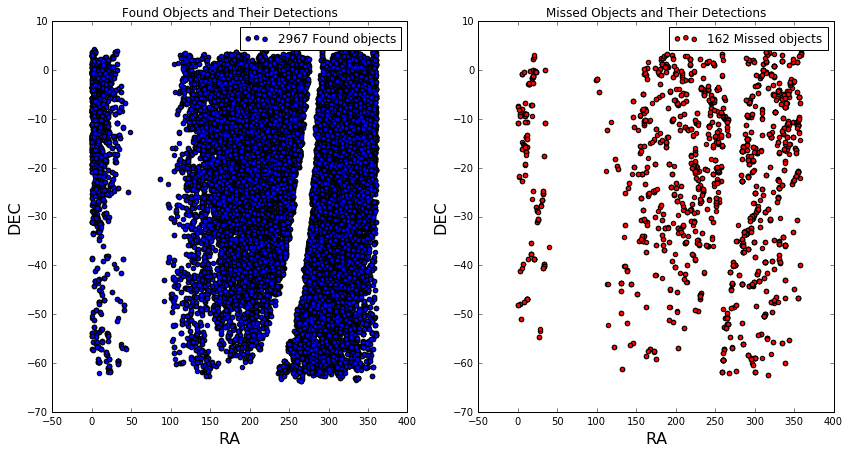

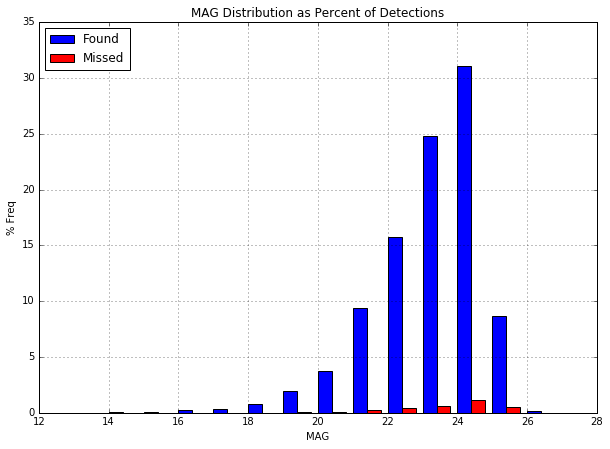

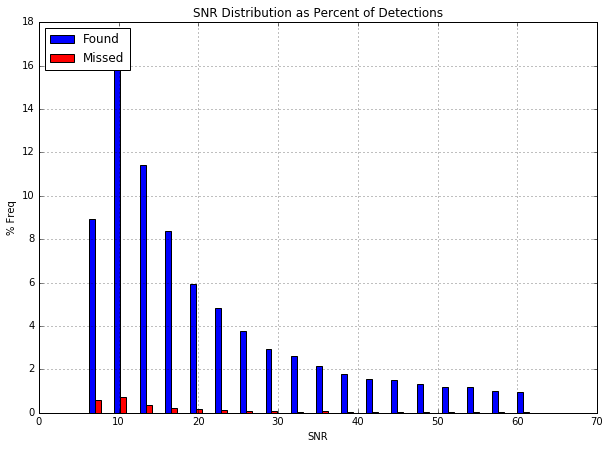

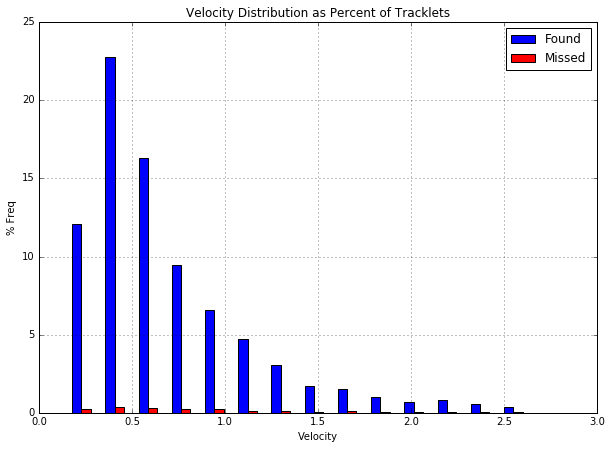

In [8]:
MopsPlotter.plotHists(con)

In [9]:
MopsDatabase.results(con)

Completeness:                  0.965191932336
Findable Objects:              3074
Found Objects:                 2967
Missed Objects:                162

findTracklets Efficiency:      0.89608614353
True Tracklets:                69487
False Tracklets:               8058
Total Tracklets:               77545

collapsedTracklets Efficiency: 0.984145439171
True Collapsed Tracklets:      9311
False Collapsed Tracklets:     150
Total Collapsed Tracklets:     9461

purifyTracklets Efficiency:    0.0731707317073
True Purified Tracklets:       3
False Purified Tracklets:      38
Total Purified Tracklets:      41

linkTracklets Efficiency:      0.102638471669
True Tracks:                   90168
False Tracks:                  788333
Total Tracks:                  878501


In [10]:
# Lets take a look at the first 10 windows...
con2 = sql.connect(tracker.mainDatabase)
window_dbs = MopsDatabase.attachDatabases(con2, tracker.windowDatabases)

Proceeding with the first 10 databases...
Attaching /Volumes/DataCenter/neosimData/jpl_2016_04_28_chiProb00_maxRMS005_trackAdd05_detErr0034_accel50/results/52391-52406.db to con as db0...
Attaching /Volumes/DataCenter/neosimData/jpl_2016_04_28_chiProb00_maxRMS005_trackAdd05_detErr0034_accel50/results/52392-52406.db to con as db1...
Attaching /Volumes/DataCenter/neosimData/jpl_2016_04_28_chiProb00_maxRMS005_trackAdd05_detErr0034_accel50/results/52393-52408.db to con as db2...
Attaching /Volumes/DataCenter/neosimData/jpl_2016_04_28_chiProb00_maxRMS005_trackAdd05_detErr0034_accel50/results/52394-52408.db to con as db3...
Attaching /Volumes/DataCenter/neosimData/jpl_2016_04_28_chiProb00_maxRMS005_trackAdd05_detErr0034_accel50/results/52395-52410.db to con as db4...
Attaching /Volumes/DataCenter/neosimData/jpl_2016_04_28_chiProb00_maxRMS005_trackAdd05_detErr0034_accel50/results/52396-52411.db to con as db5...
Attaching /Volumes/DataCenter/neosimData/jpl_2016_04_28_chiProb00_maxRMS005_trackA

In [11]:
def plotChiSquaredDistribution(trackFiles, con, windowDatabases, plotLog=False, saveAs=None, p1=0.000001, p2=0.1):
    
    fig, ax = plt.subplots(len(trackFiles),3)
    fig.set_size_inches(15, len(trackFiles)*5)
    
    for j, trackFile in enumerate(trackFiles):
    
        fileIn = open(trackFile + ".out","r")

        ra_chi = []
        dec_chi = []
        for line in fileIn:
            elements = line.split(" ")
            if len(elements) == 2:
                array = np.fromstring(line, sep=" ", dtype=float)
                dec_chi.append(array[0])
                ra_chi.append(array[1])
                
        tracks = pd.read_sql("SELECT trackId, linkedObjectId FROM %s.AllTracks" % windowDatabases[j], con)
        
        false_tracks_chi_prob_ra = []
        false_tracks_chi_prob_dec = []
        true_tracks_chi_prob_ra = []
        true_tracks_chi_prob_dec = []

        for i, t in enumerate(tracks.itertuples()):
            if t[2] == -1:
                false_tracks_chi_prob_ra.append(ra_chi[i])
                false_tracks_chi_prob_dec.append(dec_chi[i])
            else:
                true_tracks_chi_prob_ra.append(ra_chi[i])
                true_tracks_chi_prob_dec.append(dec_chi[i])
                
        false_tracks_chi_prob_ra = np.array(false_tracks_chi_prob_ra)
        false_tracks_chi_prob_dec = np.array(false_tracks_chi_prob_dec)
        true_tracks_chi_prob_ra = np.array(true_tracks_chi_prob_ra)
        true_tracks_chi_prob_dec = np.array(true_tracks_chi_prob_dec)
        
        ax[j][2].scatter(true_tracks_chi_prob_ra, true_tracks_chi_prob_dec, c="b", label="True Tracks: %s" % len(true_tracks_chi_prob_ra), s=10)
        ax[j][2].scatter(false_tracks_chi_prob_ra, false_tracks_chi_prob_dec, c="r", label="False Tracks: %s" % len(false_tracks_chi_prob_ra), s=10)
                
        if plotLog:
            false_tracks_chi_prob_ra = np.log10(false_tracks_chi_prob_ra[(false_tracks_chi_prob_ra > p1) & (false_tracks_chi_prob_ra < p2)])
            false_tracks_chi_prob_dec = np.log10(false_tracks_chi_prob_dec[(false_tracks_chi_prob_dec > p1) & (false_tracks_chi_prob_dec < p2)])
            true_tracks_chi_prob_ra = np.log10(true_tracks_chi_prob_ra[(true_tracks_chi_prob_ra > p1) & (true_tracks_chi_prob_ra < p2)])
            true_tracks_chi_prob_dec = np.log10(true_tracks_chi_prob_dec[(true_tracks_chi_prob_dec > p1) & (true_tracks_chi_prob_dec < p2)])
            ax[j][0].hist([true_tracks_chi_prob_ra, false_tracks_chi_prob_ra],color=["b","r"])
            ax[j][1].hist([true_tracks_chi_prob_dec, false_tracks_chi_prob_dec],color=["b","r"])
            ax[j][0].set_xlabel(r"$log(P({\chi}^2))$ Ra for (%s < $P({\chi}^2)$ < %s)" % (p1,p2))
            ax[j][0].set_ylabel("Number of Tracks")
            ax[j][1].set_xlabel(r"$log(P({\chi}^2))$ Dec for (%s < $P({\chi}^2)$ < %s)"  % (p1,p2))
            ax[j][2].set_xlabel(r"$P({\chi}^2)$ Ra")
            ax[j][2].set_ylabel(r"$P({\chi}^2)$ Dec")
            ax[j][2].legend()        
        else:
            ax[j][0].hist([true_tracks_chi_prob_ra,false_tracks_chi_prob_ra],color=["b","r"])
            ax[j][1].hist([true_tracks_chi_prob_dec,false_tracks_chi_prob_dec],color=["b","r"])
            ax[j][0].set_xlabel(r"$P({\chi}^2)$ Ra")
            ax[j][0].set_ylabel("Number of Tracks")
            ax[j][1].set_xlabel(r"$P({\chi}^2)$ Dec")
            ax[j][2].set_xlabel(r"$P({\chi}^2)$ Ra")
            ax[j][2].set_ylabel(r"$P({\chi}^2)$ Dec")
            ax[j][2].legend()
    
    if saveAs is not None:
        fig.savefig(saveAs)

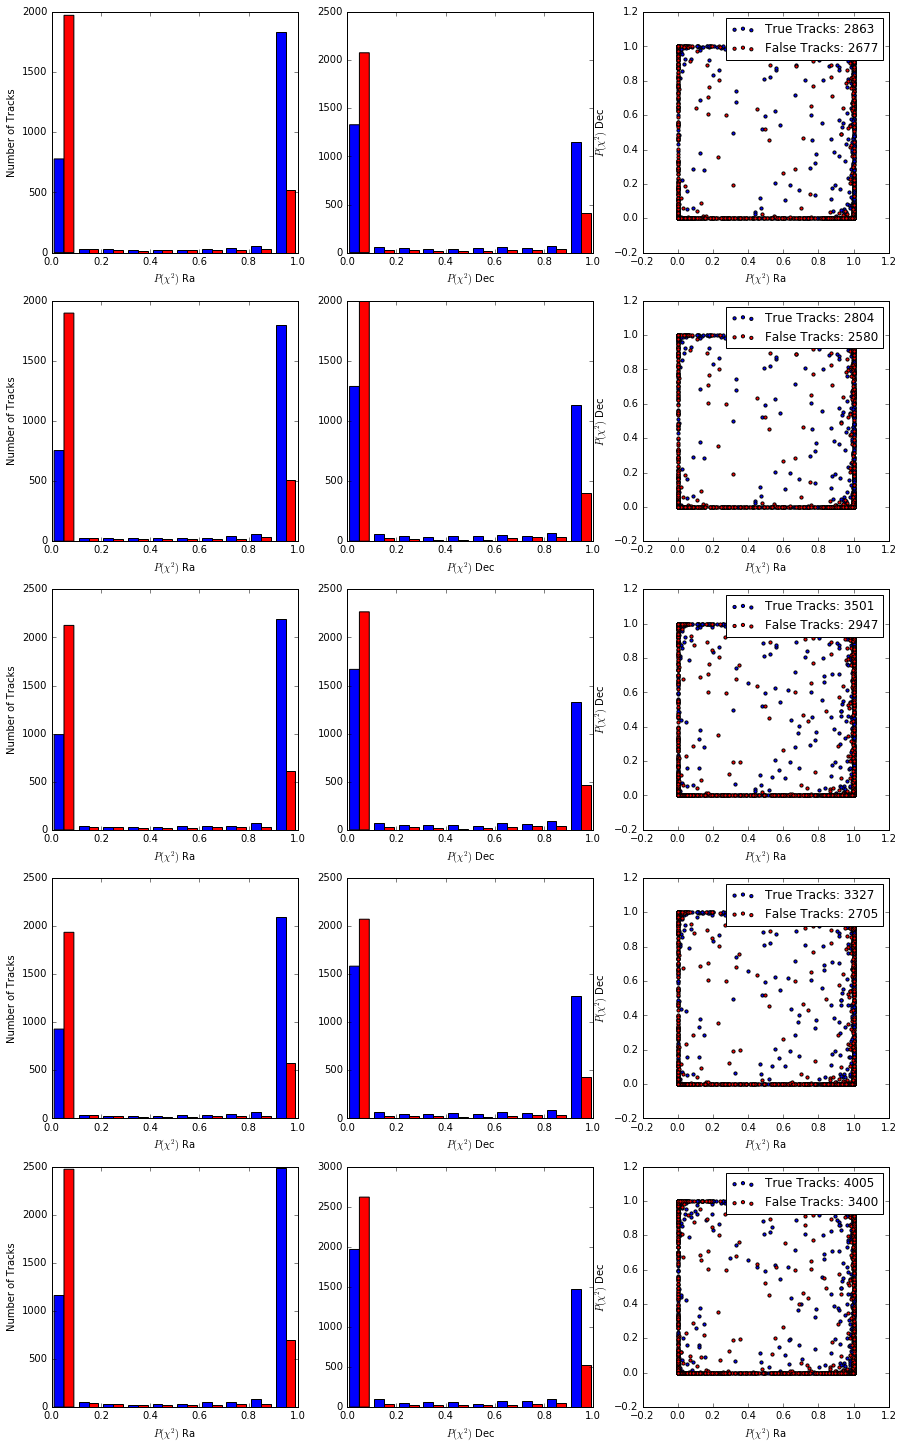

In [23]:
plotChiSquaredDistribution(tracker.tracks[0:5], con2, window_dbs[0:5],saveAs="chi1.png")

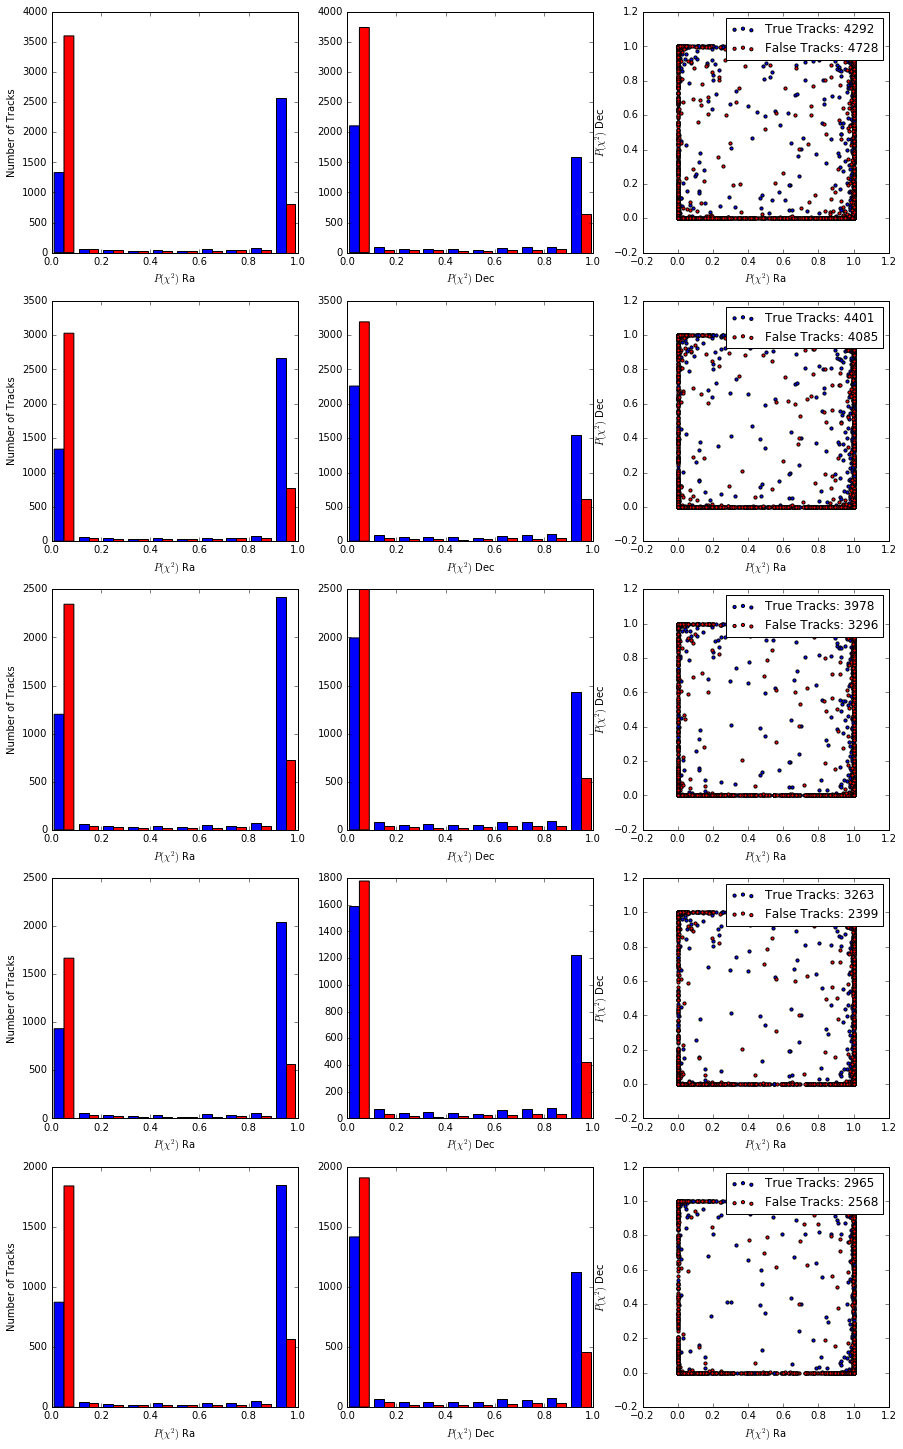

In [22]:
plotChiSquaredDistribution(tracker.tracks[5:10], con2, window_dbs[5:10],saveAs="chi2.png")

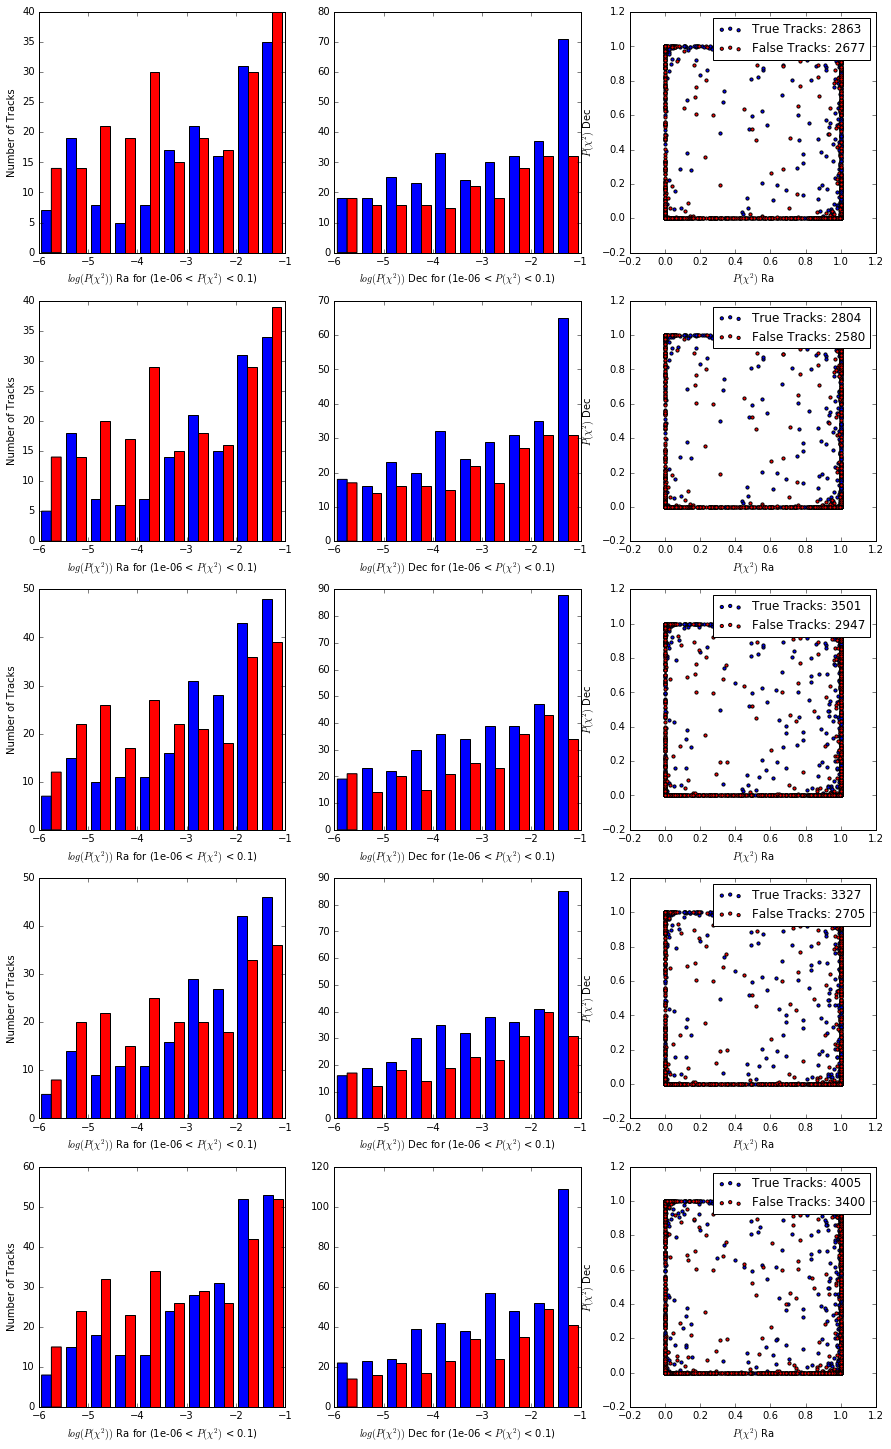

In [24]:
plotChiSquaredDistribution(tracker.tracks[0:5], con2, window_dbs[0:5],saveAs="chi1_log.png", plotLog=True)

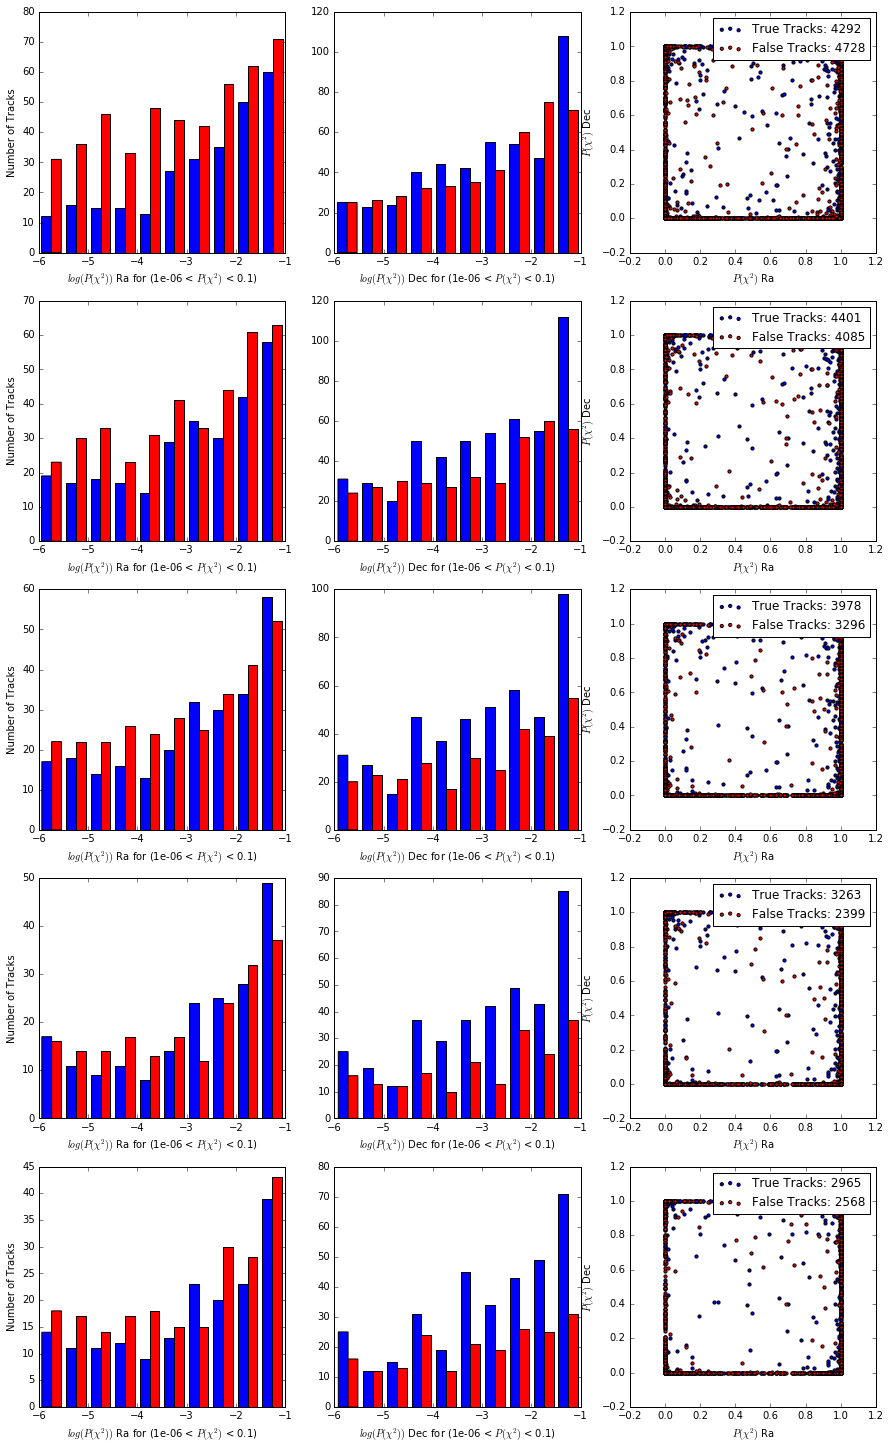

In [25]:
plotChiSquaredDistribution(tracker.tracks[5:10], con2, window_dbs[5:10],saveAs="chi2_log.png", plotLog=True)

In [118]:
def plotChiSquaredDistribution2(trackFile, con, windowDatabase, detFile, plotLog=False, saveAs=None, p1=0.000001, p2=0.1, sampleSize=10):
    
    fig, ax = plt.subplots(1,3)
    fig.set_size_inches(15, 5)
    
    fileIn = open(trackFile + ".out","r")

    ra_chi = []
    dec_chi = []
    for line in fileIn:
        elements = line.split(" ")
        if len(elements) == 2:
            array = np.fromstring(line, sep=" ", dtype=float)
            dec_chi.append(array[0])
            ra_chi.append(array[1])

    tracks = pd.read_sql("SELECT trackId, linkedObjectId FROM %s.AllTracks" % windowDatabase, con)

    false_tracks_chi_prob_ra = []
    false_tracks_chi_prob_dec = []
    true_tracks_chi_prob_ra = []
    true_tracks_chi_prob_dec = []
    true_tracks_chi_objects = []

    for i, t in enumerate(tracks.itertuples()):
        if t[2] == -1:
            false_tracks_chi_prob_ra.append(ra_chi[i])
            false_tracks_chi_prob_dec.append(dec_chi[i])
        else:
            true_tracks_chi_prob_ra.append(ra_chi[i])
            true_tracks_chi_prob_dec.append(dec_chi[i])
            true_tracks_chi_objects.append(t[2])

    false_tracks_chi_prob_ra = np.array(false_tracks_chi_prob_ra)
    false_tracks_chi_prob_dec = np.array(false_tracks_chi_prob_dec)
    true_tracks_chi_prob_ra = np.array(true_tracks_chi_prob_ra)
    true_tracks_chi_prob_dec = np.array(true_tracks_chi_prob_dec)
    true_tracks_chi_objects = np.array(true_tracks_chi_objects)

    ax[2].scatter(true_tracks_chi_prob_ra, true_tracks_chi_prob_dec, c="b", label="True Tracks: %s" % len(true_tracks_chi_prob_ra), s=10)
    ax[2].scatter(false_tracks_chi_prob_ra, false_tracks_chi_prob_dec, c="r", label="False Tracks: %s" % len(false_tracks_chi_prob_ra), s=10)

    if plotLog:
        false_tracks_chi_prob_ra = np.log10(false_tracks_chi_prob_ra[(false_tracks_chi_prob_ra > p1) & (false_tracks_chi_prob_ra < p2)])
        false_tracks_chi_prob_dec = np.log10(false_tracks_chi_prob_dec[(false_tracks_chi_prob_dec > p1) & (false_tracks_chi_prob_dec < p2)])
        true_tracks_chi_prob_ra = np.log10(true_tracks_chi_prob_ra[(true_tracks_chi_prob_ra > p1) & (true_tracks_chi_prob_ra < p2)])
        true_tracks_chi_prob_dec = np.log10(true_tracks_chi_prob_dec[(true_tracks_chi_prob_dec > p1) & (true_tracks_chi_prob_dec < p2)])
        ax[0].hist([true_tracks_chi_prob_ra, false_tracks_chi_prob_ra],color=["b","r"])
        ax[1].hist([true_tracks_chi_prob_dec, false_tracks_chi_prob_dec],color=["b","r"])
        ax[0].set_xlabel(r"$log(P({\chi}^2))$ Ra for (%s < $P({\chi}^2)$ < %s)" % (p1,p2))
        ax[0].set_ylabel("Number of Tracks")
        ax[1].set_xlabel(r"$log(P({\chi}^2))$ Dec for (%s < $P({\chi}^2)$ < %s)"  % (p1,p2))
        ax[2].set_xlabel(r"$P({\chi}^2)$ Ra")
        ax[2].set_ylabel(r"$P({\chi}^2)$ Dec")
        ax[2].legend()        
    else:
        ax[0].hist([true_tracks_chi_prob_ra,false_tracks_chi_prob_ra],color=["b","r"])
        ax[1].hist([true_tracks_chi_prob_dec,false_tracks_chi_prob_dec],color=["b","r"])
        ax[0].set_xlabel(r"$P({\chi}^2)$ Ra")
        ax[0].set_ylabel("Number of Tracks")
        ax[1].set_xlabel(r"$P({\chi}^2)$ Dec")
        ax[2].set_xlabel(r"$P({\chi}^2)$ Ra")
        ax[2].set_ylabel(r"$P({\chi}^2)$ Dec")
        ax[2].legend()
        
    if saveAs is not None:
        fig.savefig(saveAs)
        
    a = true_tracks_chi_prob_ra
    b = true_tracks_chi_prob_dec
    c = true_tracks_chi_objects
        
    goodfits = np.unique(c[np.where((a > 0.9) & (b > 0.9))])
    badfits = np.unique(c[np.where((a < 0.1) & (b < 0.1))])
    goodRaBadDec = np.unique(c[np.where((a > 0.9) & (b < 0.1))])
    badRaGoodDec = np.unique(c[np.where((a < 0.1) & (b > 0.9))])
    bothfits = np.unique(np.intersect1d(goodfits,badfits))
    bothfits_all = np.unique(reduce(np.intersect1d, (goodfits,badfits,badRaGoodDec,goodRaBadDec)))

    shared_sums = (len(bothfits), 0, 0, len(bothfits))
    shared_sums_all = (len(bothfits_all), len(bothfits_all), len(bothfits_all), len(bothfits_all))

    n_groups = 4

    sums = (len(goodfits), len(goodRaBadDec), len(badRaGoodDec), len(badfits))

    fig, ax = plt.subplots(1,1)

    index = np.arange(n_groups)
    bar_width = 0.75
    
    rects1 = plt.bar(index + 0.08, sums, bar_width, color="b", alpha=0.4)
    rects2 = plt.bar(index + 0.08, shared_sums, bar_width, color="b", alpha=0.6)
    rects3 = plt.bar(index + 0.08, shared_sums_all, bar_width, color="b")

    plt.xlabel('Track Quality')
    plt.ylabel('Number of Unique Objects')
    plt.title('Distribution of Objects in True Tracks')
    plt.xticks(index + 0.5*bar_width, ("$P({\chi}^2)$ Ra > 0.9 \n $P({\chi}^2)$ Dec > 0.9", "$P({\chi}^2)$ Ra > 0.9 \n $P({\chi}^2)$ Dec < 0.1", "$P({\chi}^2)$ Ra < 0.1 \n $P({\chi}^2)$ Dec > 0.9", "$P({\chi}^2)$ Ra < 0.1 \n $P({\chi}^2)$ Dec < 0.1"))
    plt.tight_layout()
    plt.savefig("trackDistrib.png")
    
    dets = MopsReader.readDetectionsIntoDataframe(detFile)
    
    goodfits_dets = dets[dets["objectId"].isin(np.random.choice(goodfits, size=sampleSize))]
    badfits_dets = dets[dets["objectId"].isin(np.random.choice(badfits, size=sampleSize))]
    goodRaBadDec_dets = dets[dets["objectId"].isin(np.random.choice(goodRaBadDec, size=sampleSize))]
    badRaGoodDec_dets = dets[dets["objectId"].isin(np.random.choice(badRaGoodDec, size=sampleSize))]
    bothfits_dets = dets[dets["objectId"].isin(np.random.choice(bothfits, size=sampleSize))]
    bothfits_all_dets = dets[dets["objectId"].isin(np.random.choice(bothfits_all, size=sampleSize))]
    
    goodfits_dets.to_csv("GoodRaGoodDec.txt", sep=" ")
    badfits_dets.to_csv("BadRaBadDec.txt", sep=" ")
    goodRaBadDec_dets.to_csv("GoodRaBadDec.txt", sep=" ")
    badRaGoodDec_dets.to_csv("BadRaGoodDec.txt", sep=" ")
    bothfits_dets.to_csv("2Groups.txt", sep=" ")
    bothfits_all_dets.to_csv("4Groups.txt", sep=" ")
        
    return goodfits, goodfits_dets

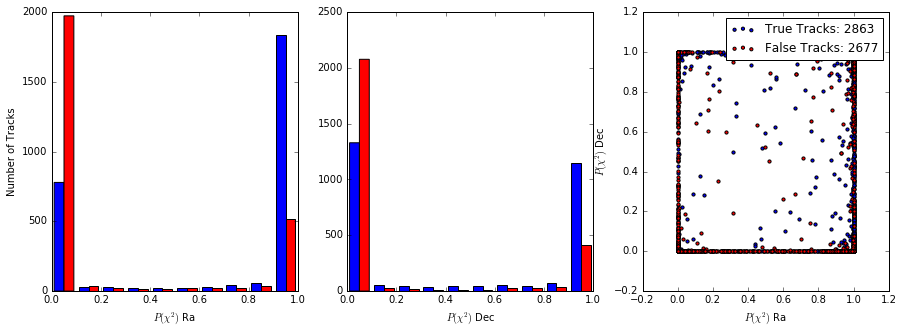

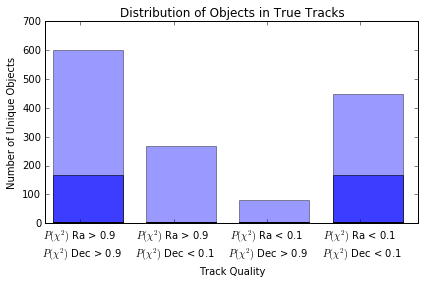

In [119]:
a, b = plotChiSquaredDistribution2(tracker.tracks[0], con2, window_dbs[0], tracker.dets[0], saveAs="trackSummary.png")

In [18]:
from functools import reduce

In [ ]:
def plotRunSummary(results):
    fig, ax = plt.subpl
    
    n_groups = 6

    sums = ()

    fig, ax = plt.subplots(1,1)

    index = np.arange(n_groups)
    bar_width = 0.75
    
    rects1 = plt.bar(index + 0.08, sums, bar_width, color="b", alpha=0.4)

    plt.xlabel('Track Quality')
    plt.ylabel('Number of Unique Objects')
    plt.title('Distribution of Objects in True Tracks')
    plt.xticks(index + 0.5*bar_width, ("$P({\chi}^2)$ Ra > 0.9 \n $P({\chi}^2)$ Dec > 0.9", "$P({\chi}^2)$ Ra > 0.9 \n $P({\chi}^2)$ Dec < 0.1", "$P({\chi}^2)$ Ra < 0.1 \n $P({\chi}^2)$ Dec > 0.9", "$P({\chi}^2)$ Ra < 0.1 \n $P({\chi}^2)$ Dec < 0.1"))
    plt.tight_layout()
    plt.savefig("trackDistrib.png")

In [8]:
MopsDatabase.countTrueTracklets(con)

69487